In [1]:
import control

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num = np.array([1])
den = np.array([1, 0.8, 1])

gs = control.TransferFunction(num, den)
gs

TransferFunction(array([1]), array([1. , 0.8, 1. ]))

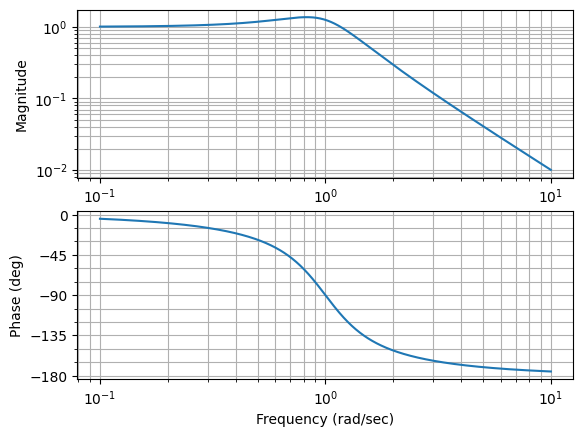

In [4]:
(mag, phase, w) = control.bode_plot(gs)

In [11]:
#1 rad/s = 0.159155 Hz

#Freq ganho unitário, 1.1662 -> figura bode_ganUn.png

freqS = 10*(1.1662*0.159155)
freqS
Ts = 1/freqS

print("Frequência escolhida: " + str(freqS) + " Hz Periodo de amostragem: "+ str(Ts) + " s")

Frequência escolhida: 1.8560656099999997 Hz Periodo de amostragem: 0.5387740576692223 s


In [12]:
gz = control.sample_system(gs, Ts, method = 'zoh')
gz           

TransferFunction(array([0.12341497, 0.10677001]), array([ 1.        , -1.41966142,  0.6498464 ]), 0.5387740576692223)

In [24]:
gz2 = control.sample_system(gs, Ts, method = 'bilinear')
gz2

TransferFunction(array([0.05633922, 0.11267845, 0.05633922]), array([ 1.        , -1.44002135,  0.66537825]), 0.5387740576692223)

In [13]:
#Feito a mao
from scipy import signal
residues = signal.residue([1],[1, 0.8 ,1,0])
residues

(array([ 1. +0.j        , -0.5+0.21821789j, -0.5-0.21821789j]),
 array([ 0. +0.j        , -0.4+0.91651514j, -0.4-0.91651514j]),
 array([], dtype=float64))

In [14]:
#Mostrando o sinal obtido
import sympy
from sympy import Symbol
import cmath

In [15]:
z = Symbol('z')
e = Symbol('e')

In [16]:
Gz1 = 1 - ((z-1)*(residues[0][1]))/(z-e**((residues[1][1])*Ts)) - ((z-1)*(residues[0][2]))/(z-e**((residues[1][2])*Ts))
Gz1

1 - (-0.5 + 0.218217890235992*I)*(z - 1)/(-e**(-0.215509623067689 + 0.493794580349543*I) + z) - (-0.5 - 0.218217890235992*I)*(z - 1)/(-e**(-0.215509623067689 - 0.493794580349543*I) + z)

In [17]:
z1 = control.TransferFunction.z
Gz2 = 1 - ((z1-1)*(residues[0][1]))/(z1-cmath.exp((residues[1][1])*Ts)) - ((z1-1)*(residues[0][2]))/(z1-cmath.exp((residues[1][2])*Ts))
Gz2

TransferFunction(array([ 2.        +0.00000000e+00j, -2.96273782+0.00000000e+00j,
        1.1929228 -5.55111512e-17j]), array([ 1.        +0.j, -1.41966142+0.j,  0.6498464 +0.j]), True)

In [18]:
yout1, T1 = control.step_response(gz)

In [25]:
yout3, T3 = control.step_response(gz2)

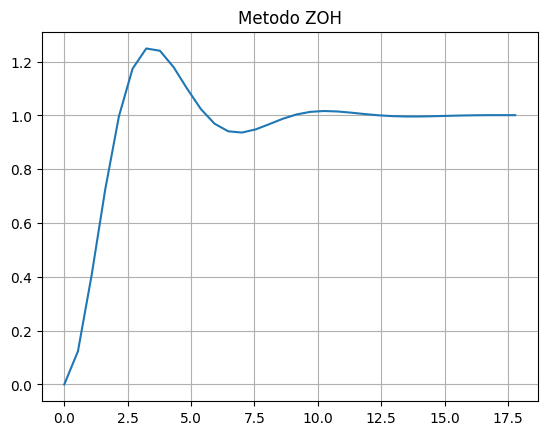

In [33]:
plt.title("Metodo ZOH")
plt.grid()
plt.plot(yout1, T1)

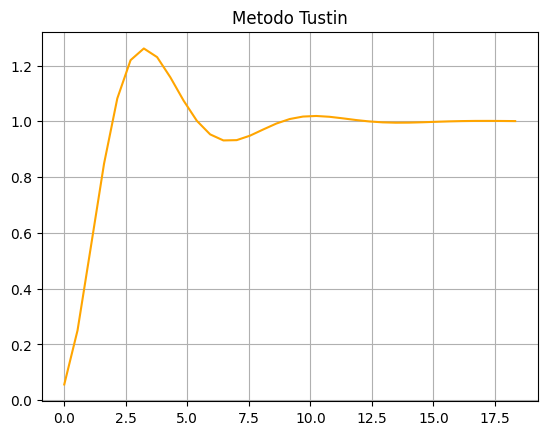

In [31]:
plt.title("Metodo Tustin")
plt.grid()
plt.plot(yout3, T3, color =  'orange')

In [37]:
yout2, T2 = control.step_response(Gz2)

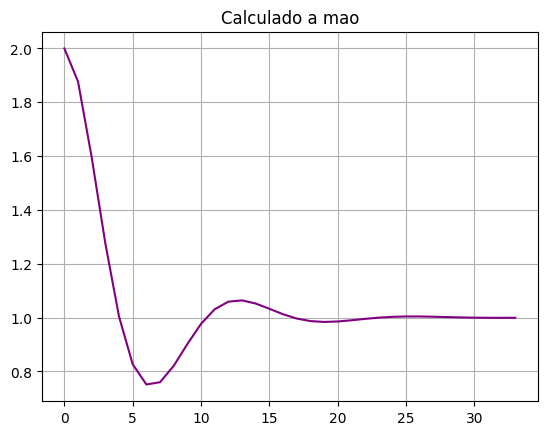

In [38]:
plt.title("Calculado a mao")
plt.grid()
plt.plot(yout2, T2, color = 'purple')